Model accuracy: 50.00%


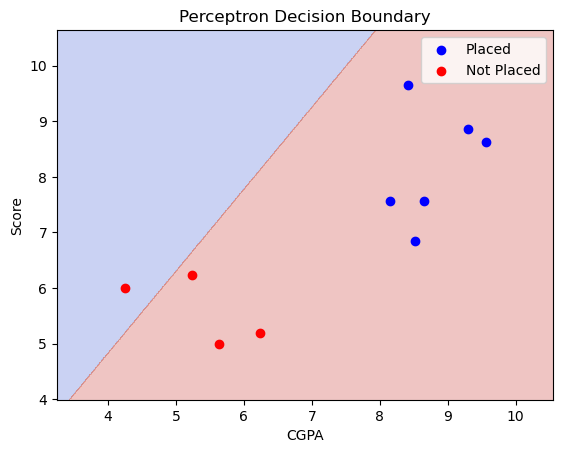

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load the Data
data = pd.read_excel("C:\\Users\\Aditya Yadav\\OneDrive\\Desktop\\project_dbms\\placement.xlsx")

# Step 2: Preprocess the Data
X = data[['cgpa', 'score']].values  # Features
y = data['placed'].values  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Perceptron Model
perceptron = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
perceptron.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Step 5: Visualize Decision Boundary
# Define a mesh to plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict values across the mesh
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Placed')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Not Placed')
plt.xlabel('CGPA')
plt.ylabel('Score')
plt.legend()
plt.title("Perceptron Decision Boundary")
plt.show()
